# A2
## Part 1 - Generate a sinusoid

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Write a function to generate a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), 
sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid.

In [5]:
def genSine(A, f, phi, fs, t):
    """
    Inputs:
        A (float) =  amplitude of the sinusoid
        f (float) = frequency of the sinusoid in Hz
        phi (float) = initial phase of the sinusoid in radians
        fs (float) = sampling frequency of the sinusoid in Hz
        t (float) =  duration of the sinusoid (is second)
    Output:
        The function should return a numpy array
        x (numpy array) = The generated sinusoid (use np.cos())
    """
    ## Your code here
    T = 1.0/fs      # sample period
    N = t/T        # numbel of samples
    n = np.arange(N)  # time index
    x = A * np.cos(2 * np.pi * f * n * T + phi)
    
    return x

If you run your code using `A=1.0`, `f = 10.0`, `phi = 1.0`, `fs = 50.0` and `t = 0.1`, the output numpy array should be:

```
array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
```

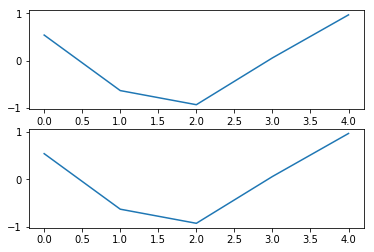

In [6]:
## Your code here
y = np.array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])

A = 1.0
f = 10.0
phi = 1.0
fs = 50.0
t = 0.1
x = genSine(A, f, phi, fs, t)

plt.subplot(2,1,1)
plt.plot(y)

plt.subplot(2,1,2)
plt.plot(x)
plt.show()

## Part 2 - Generate a complex sinusoid 

Write a function to generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. Note that the complex sinusoid used in DFT computation has a 
negative sign in the exponential function.

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. 
The function should return cSine, a numpy array of the complex sinusoid.

In [10]:
def genComplexSine(k, N):
    """
    Inputs:
        k (integer) = frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid in samples
    Output:
        The function should return a numpy array
        cSine (numpy array) = The generated complex sinusoid (length N)
    """
    ## Your code here
    n = np.arange(N)      # time index
    
    s_k = np.exp(1j * 2 * np.pi * k * n / N)
    
    return np.conjugate(s_k)

If you run your function using `N=5` and `k=1`, the function should return the following numpy array cSine:

```
array([ 1.0 + 0.j,  0.30901699 - 0.95105652j, -0.80901699 - 0.58778525j, -0.80901699 + 0.58778525j, 0.30901699 + 0.95105652j])
```

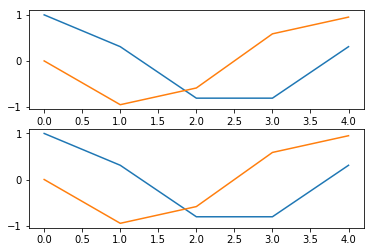

In [11]:
## Your code here
y = np.array([1.0 + 0.j,  0.30901699 - 0.95105652j, -0.80901699 - 0.58778525j, 
              -0.80901699 + 0.58778525j, 0.30901699 + 0.95105652j])
k = 1
N = 5
x = genComplexSine(k, N)
plt.subplot(2,1,1)
plt.plot(np.real(y))
plt.plot(np.imag(y))

plt.subplot(2,1,2)
plt.plot(np.real(x))
plt.plot(np.imag(x))

## Part 3 - Implement the discrete Fourier transform (DFT)

Write a function that implements the discrete Fourier transform (DFT). Given a sequence `x` of length `N`, the function should return its DFT, its spectrum of length `N` with the frequency indexes ranging from 0 
to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array `X` which is of the DFT of `x`.

In [14]:
def DFT(x):
    """
    Input:
        x (numpy array) = input sequence of length N
    Output:
        The function should return a numpy array of length N
        X (numpy array) = The N point DFT of the input sequence x
    """
    ## Your code here
    N = x.size    # number of samples
    X = np.array([])
    for k in range(N):
        s = genComplexSine(k, N)
        X = np.append(X, np.sum(x * s))
        
    return X

If you run your function using `x = np.array([1, 2, 3, 4])`, the function shoulds return the following numpy array:

```
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
```

Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending
on your machine.

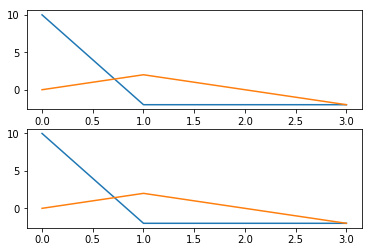

In [15]:
## Your code here
y = np.array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])

input_signal = np.array([1,2,3,4])

x = DFT(input_signal)
plt.subplot(2,1,1)
plt.plot(np.real(y))
plt.plot(np.imag(y))

plt.subplot(2,1,2)
plt.plot(np.real(x))
plt.plot(np.imag(x))

## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

Write a function that implements the inverse discrete Fourier transform (IDFT). Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the 
frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function should return 
a numpy array of the IDFT of `X`.

Remember to scale the output appropriately.

In [18]:
def genComplexSine(k_n, N, inv=False):
    
    seq_index = np.arange(N)
    
    s = np.exp(1j * 2 * np.pi * k_n * seq_index / N)
    
    if inv:
        return np.conjugate(s)
    else:
        return s
    
def IDFT(X):
    """
    Input:
        X (numpy array) = frequency spectrum (length N)
    Output:
        The function should return a numpy array of length N 
        x (numpy array) = The N point IDFT of the frequency spectrum X
    """
    ## Your code here
    N = X.size    # number of samples
    
    x = np.array([])
    
    for n in range(N):
        s = genComplexSine(n, N)
        x = np.append(x, 1.0/N * np.sum(X*s))
    
    return x

If you run your function using `X = np.array([1 ,1 ,1 ,1])`, the function should return the following numpy 
array `x`: 

```
array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
```

Notice that the output numpy array is essentially [1, 0, 0, 0]. Instead of exact 0 we get very small
numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are 
machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of 
a sequence as the input to the IDFT. See if you get back the original time domain sequence.

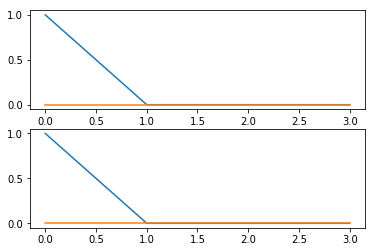

In [19]:
## Your code here
y = np.array([1.00000000e+00 +0.00000000e+00j,   
              -4.59242550e-17 +5.55111512e-17j,
              0.00000000e+00 +6.12323400e-17j,8.22616137e-17 +8.32667268e-17j])

X = np.array([1,1,1,1])

x = IDFT(X)

plt.subplot(2,1,1)
plt.plot(np.real(y))
plt.plot(np.imag(y))

plt.subplot(2,1,2)
plt.plot(np.real(x))
plt.plot(np.imag(x))

## Part 5 - Compute the magnitude spectrum (Optional)

Write a function that computes the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array of the magnitude spectrum of `x`.

In [24]:
def genMagSpec(x):
    """
    Input:
        x (numpy array) = input sequence of length N
    Output:
        The function should return a numpy array
        magX (numpy array) = The magnitude spectrum of the input sequence x
                             (length N)
    """
    ## Your code here
    X = DFT(x)
    
    return np.abs(X)

If you run your function using `x = np.array([1, 2, 3, 4])`, the function should return the following numpy array `magX`:

```
array([10.0, 2.82842712, 2.0, 2.82842712])
```

[10.+0.00000000e+00j -2.-2.00000000e+00j -2.+9.79717439e-16j
 -2.+2.00000000e+00j]


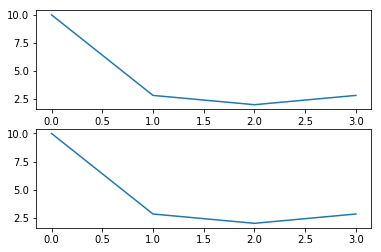

In [26]:
## Your code here
y = np.array([10.0, 2.82842712, 2.0, 2.82842712])

x = np.array([1,2,3,4])

mX = genMagSpec(x)

plt.subplot(2,1,1)
plt.plot(y)


plt.subplot(2,1,2)
plt.plot(mX)